In [124]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')

In [3]:
df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,2,0,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,3,1,0
6089,3,2,2,0,2,1,0,1,0,1,...,6,7,0,2,1,0,7,4,0,1
6090,5,2,3,0,1,1,0,1,9,0,...,7,7,0,2,1,4,3,4,0,1
6091,3,2,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0


In [8]:
X = df.drop('class', axis = 1)

In [10]:
y = df['class']

In [11]:
y

0       0
1       1
2       1
3       0
4       0
       ..
6088    0
6089    1
6090    1
6091    0
6092    1
Name: class, Length: 6093, dtype: int64

In [13]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,0,3,1,5,1,0,0,9,1,...,2,3,7,0,2,1,4,3,5,0
1,2,0,4,0,5,1,0,1,10,0,...,3,7,4,0,2,1,0,7,4,0
2,2,0,3,0,2,1,0,0,7,0,...,1,0,4,0,2,1,2,1,5,1
3,0,0,3,0,5,1,1,0,2,0,...,2,7,7,0,2,2,4,7,3,1
4,2,3,3,1,5,1,0,0,10,1,...,2,3,6,0,2,1,4,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,2,0,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,3,1
6089,3,2,2,0,2,1,0,1,0,1,...,2,6,7,0,2,1,0,7,4,0
6090,5,2,3,0,1,1,0,1,9,0,...,2,7,7,0,2,1,4,3,4,0
6091,3,2,3,0,5,1,1,0,2,0,...,2,7,7,0,2,2,4,7,3,1


In [28]:
params = {
          'n_estimators' : [10, 20, 30, 40, 50],
          'max_depth' : [1, 3, 5, 7, 9, 11],
          'min_samples_leaf' : [1, 2, 3, 4, 5, 6, 7],
          'min_samples_split' : [2, 4, 6, 8]
          
          }

In [29]:
rf = RandomForestClassifier(random_state=0)

In [30]:
clf = GridSearchCV(rf, params, n_jobs = -1, cv = 3)

In [31]:
clf.fit(X,y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [47]:
best_clf = clf.best_estimator_

In [38]:
clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

<bound method BaseEstimator.set_params of GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 20, 30, 40, 50]})>

In [40]:
rf.feature_importances_

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [42]:
rf.fit(X,y)

RandomForestClassifier(random_state=0)

In [43]:
rf.feature_importances_

array([0.00504667, 0.00945415, 0.01466471, 0.07169127, 0.1352064 ,
       0.00100954, 0.04906516, 0.11332963, 0.0813746 , 0.02099985,
       0.0638954 , 0.05912506, 0.04882223, 0.01249844, 0.01786969,
       0.        , 0.00501178, 0.01078377, 0.07236688, 0.10054025,
       0.07359177, 0.03365274])

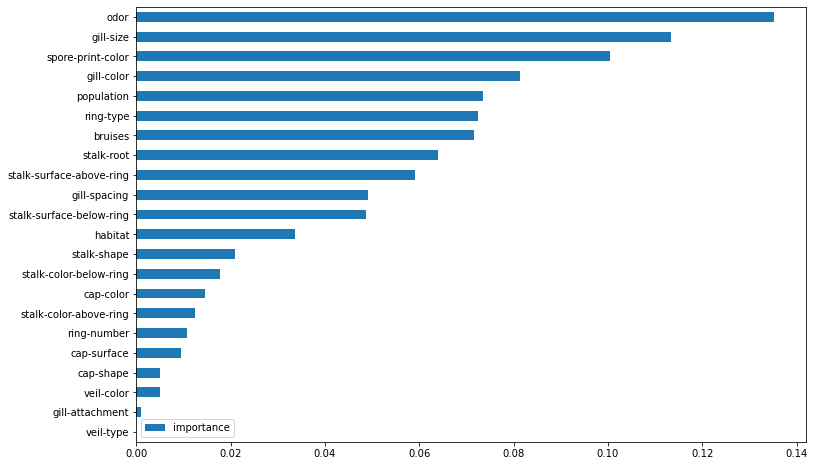

In [44]:
imp = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [45]:
dff = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')

In [46]:
dff

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,3,3,2,0,2,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2
2027,5,2,8,1,0,1,0,0,10,0,...,2,7,7,0,2,1,4,2,2,1
2028,5,3,3,0,2,1,0,0,3,0,...,1,6,0,0,2,1,2,1,4,4
2029,5,3,3,1,5,1,0,0,9,1,...,2,3,3,0,2,1,4,3,4,0


In [52]:
pred = pd.DataFrame(best_clf.predict(dff))

In [50]:
mush = pd.read_csv('C:\\Users\\fores\\Downloads\\mushrooms.csv')

In [51]:
mush

,class
0,0
1,0
2,1
3,1
4,1
...,...
2026,1
2027,0
2028,1
2029,0


In [59]:
mush = mush.reset_index()

In [60]:
pred = pred.reset_index()

In [61]:
aa = mush.merge(pred, on = 'index')

In [67]:
aa = aa.drop('index', axis = 1)

In [80]:
aa.columns

Index(['class', 'noth'], dtype='object')

In [77]:
aa = aa.rename(columns = {0 : 'noth'})

In [81]:
import seaborn as sns

sns.heatmap(aa['class', 'noth'], annot=True,annot_kws={"size": 16})

KeyError: ('class', 'noth')

In [82]:
ww = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')

In [87]:
ww

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806
...,...,...,...,...,...,...,...
495,fighter,9.901731,7.162124,58.095069,0.145065,395762,12.901909
496,transport,3.574132,7.118835,62.928159,0.469670,435926,39.926551
497,fighter,9.186049,4.580781,412.102112,0.108195,299594,12.178203
498,fighter,8.278256,8.353756,268.121561,0.132661,361911,13.905809


In [93]:
ww['class'].unique()

array(['transport', 'fighter', 'cruiser'], dtype=object)

In [94]:
X = ww.drop('class', axis = 1)

In [95]:
y = ww['class']

In [97]:
rf = RandomForestClassifier()

In [98]:
params = {
    'n_estimators' : [10,20,50],
    'max_depth' : [1,2,3,4,5,6,7,8,9,10],
    'min_samples_split' : [1,2,3,4,5,6],
    'min_samples_leaf' : [1,2,3,4,5,6,7]
}

In [101]:
clf = GridSearchCV(rf, params, cv = 3, n_jobs = -1)

In [102]:
clf.fit(X,y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [10, 20, 50]})

In [104]:
clf.score(X,y)

1.0

In [105]:
test_ww = pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')

In [106]:
test_ww

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813
...,...,...,...,...,...,...
1495,11.755466,5.583147,325.069957,0.170644,388400,13.210917
1496,12.220137,4.023177,439.975574,0.163958,195305,13.819358
1497,1.611053,7.864930,65.025106,0.430021,307856,47.369083
1498,7.114131,5.532188,391.178342,0.150117,51590,12.447761


In [108]:
predicted = pd.DataFrame(clf.predict(test_ww))

In [111]:
predicted = predicted.reset_index()

In [112]:
predicted

,index,0
0,0,fighter
1,1,transport
2,2,transport
3,3,transport
4,4,fighter
...,...,...
1495,1495,fighter
1496,1496,fighter
1497,1497,transport
1498,1498,fighter


In [114]:
qq = predicted.groupby(0).agg({'index' : 'count'})

In [115]:
qq

,index
0,
cruiser,230
fighter,675
transport,595


In [119]:
rf.feature_importances_

array([0.2017296 , 0.04379626, 0.08935419, 0.27553657, 0.00049585,
       0.38908754])

In [118]:
rf.fit(X,y)

RandomForestClassifier()

In [120]:
X

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,12.876769,2.452950,195.805771,0.150446,23109,11.328806
...,...,...,...,...,...,...
495,9.901731,7.162124,58.095069,0.145065,395762,12.901909
496,3.574132,7.118835,62.928159,0.469670,435926,39.926551
497,9.186049,4.580781,412.102112,0.108195,299594,12.178203
498,8.278256,8.353756,268.121561,0.132661,361911,13.905809


In [121]:
ERE = pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')

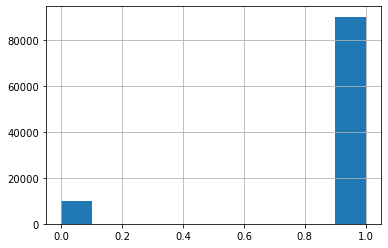

In [127]:
ERE.dangerous.hist()

In [132]:
ERE

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1
...,...,...,...,...,...,...,...,...
99995,301.7,249.0,39.8244,0.397064,0,1,1,1
99996,194.0,350.0,25.6080,-1.062202,0,1,1,1
99997,201.4,112.0,26.5848,1.571040,0,1,1,1
99998,7.8,115.0,1.0296,-1.206575,0,1,1,1


In [139]:
ERE.columns

Index(['r', 'phi', 'peradventure_index', 'dustiness', 'black_hole_is_near',
       'buggers_were_noticed', 'nearby_system_has_planemo', 'dangerous'],
      dtype='object')

In [131]:
import seaborn as sns

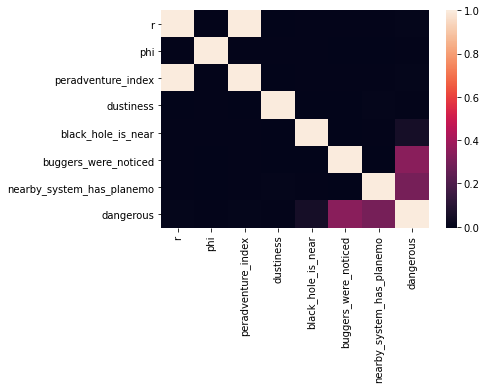

In [146]:
sns.heatmap(ERE.corr())